In [1]:
### 패키지 설치

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc #garbage collector

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools #웹 시각화 라이브러리인 d3.js 를 이용하여 보다 interactive 하게 그래프를 만들어주는 모듈.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #TfidVectorizer: Term Frequency-Inverse Document Frequency(단어 빈도- 역문서 빈도)
from sklearn.decomposition import TruncatedSVD #특이값 분해(Singular Value Decomposition, SVD)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random


In [2]:
data = pd.read_excel('2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')
data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1','강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1',
               '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2','강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2',
                '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3','강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3',
                '유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4','강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4',
                '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5','강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5',
                '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6','강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6',
               ]

In [3]:
data = data.drop([0])
data = data.astype('float64')

In [4]:
data

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7.0,8.0,7.0,8.0,2.53,122.56250,6.4000,7.0,8.0,7.0,8.0,2.53,122.550000,6.4000,7.0,8.0,7.0,8.0,2.53,122.558333,7.3000,7.0,8.0,10.0,10.0,2.53,122.667857,7.3000,7.0,8.0,10.0,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7.0,9.0,7.0,8.0,2.53,122.55625,7.3000,7.0,9.0,7.0,8.0,2.53,122.558333,7.3000,7.0,9.0,8.0,8.0,2.53,122.566667,8.2000,7.0,9.0,10.0,11.0,2.53,122.660714,8.2000,7.0,9.0,10.0,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7.0,10.0,7.0,8.0,2.53,122.55625,8.2000,7.0,10.0,8.0,8.0,2.53,122.566667,8.2000,7.0,10.0,10.0,10.0,2.53,122.575000,11.3000,9.0,10.0,15.0,14.0,2.53,122.653571,11.3000,9.0,10.0,15.0,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585
5,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7.0,12.0,8.0,10.0,2.53,122.55625,11.3000,9.0,12.0,10.0,10.0,2.53,122.575000,11.3000,9.0,12.0,10.0,11.0,2.53,122.575000,14.4000,12.0,12.0,18.0,16.0,2.53,122.639286,14.4000,12.0,12.0,18.0,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.16,129.99375,2.3689,1.0,0.0,0.0,0.0,3.16,130.016667,2.3689,1.0,0.0,0.0,0.0,3.16,130.025000,2.3689,1.0,0.0,1.0,0.0,3.16,129.882143,2.3689,1.0,0.0,1.0,0.0,3.16,129.916,2.1722,1.0,0.0,0.0,0.0,3.16,129.950
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.15,130.00625,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,1.0,0.0,3.15,129.896429,2.3689,1.0,0.0,1.0,0.0,3.15,129.928,2.0805,1.0,0.0,0.0,0.0,3.15,129.970
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.13,130.01250,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,1.0,0.0,3.13,129.910714,2.3689,1.0,0.0,1.0,0.0,3.13,129.940,2.0354,1.0,0.0,0.0,0.0,3.13,129.980
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.11,130.01875,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,1.0,0.0,3.11,129.925000,2.3488,1.0,0.0,1.0,0.0,3.11,129.952,1.8993,1.0,0.0,0.0,0.0,3.11,129.990


In [5]:
test = data.iloc[2891:,:]
train = data.iloc[:2891,:]

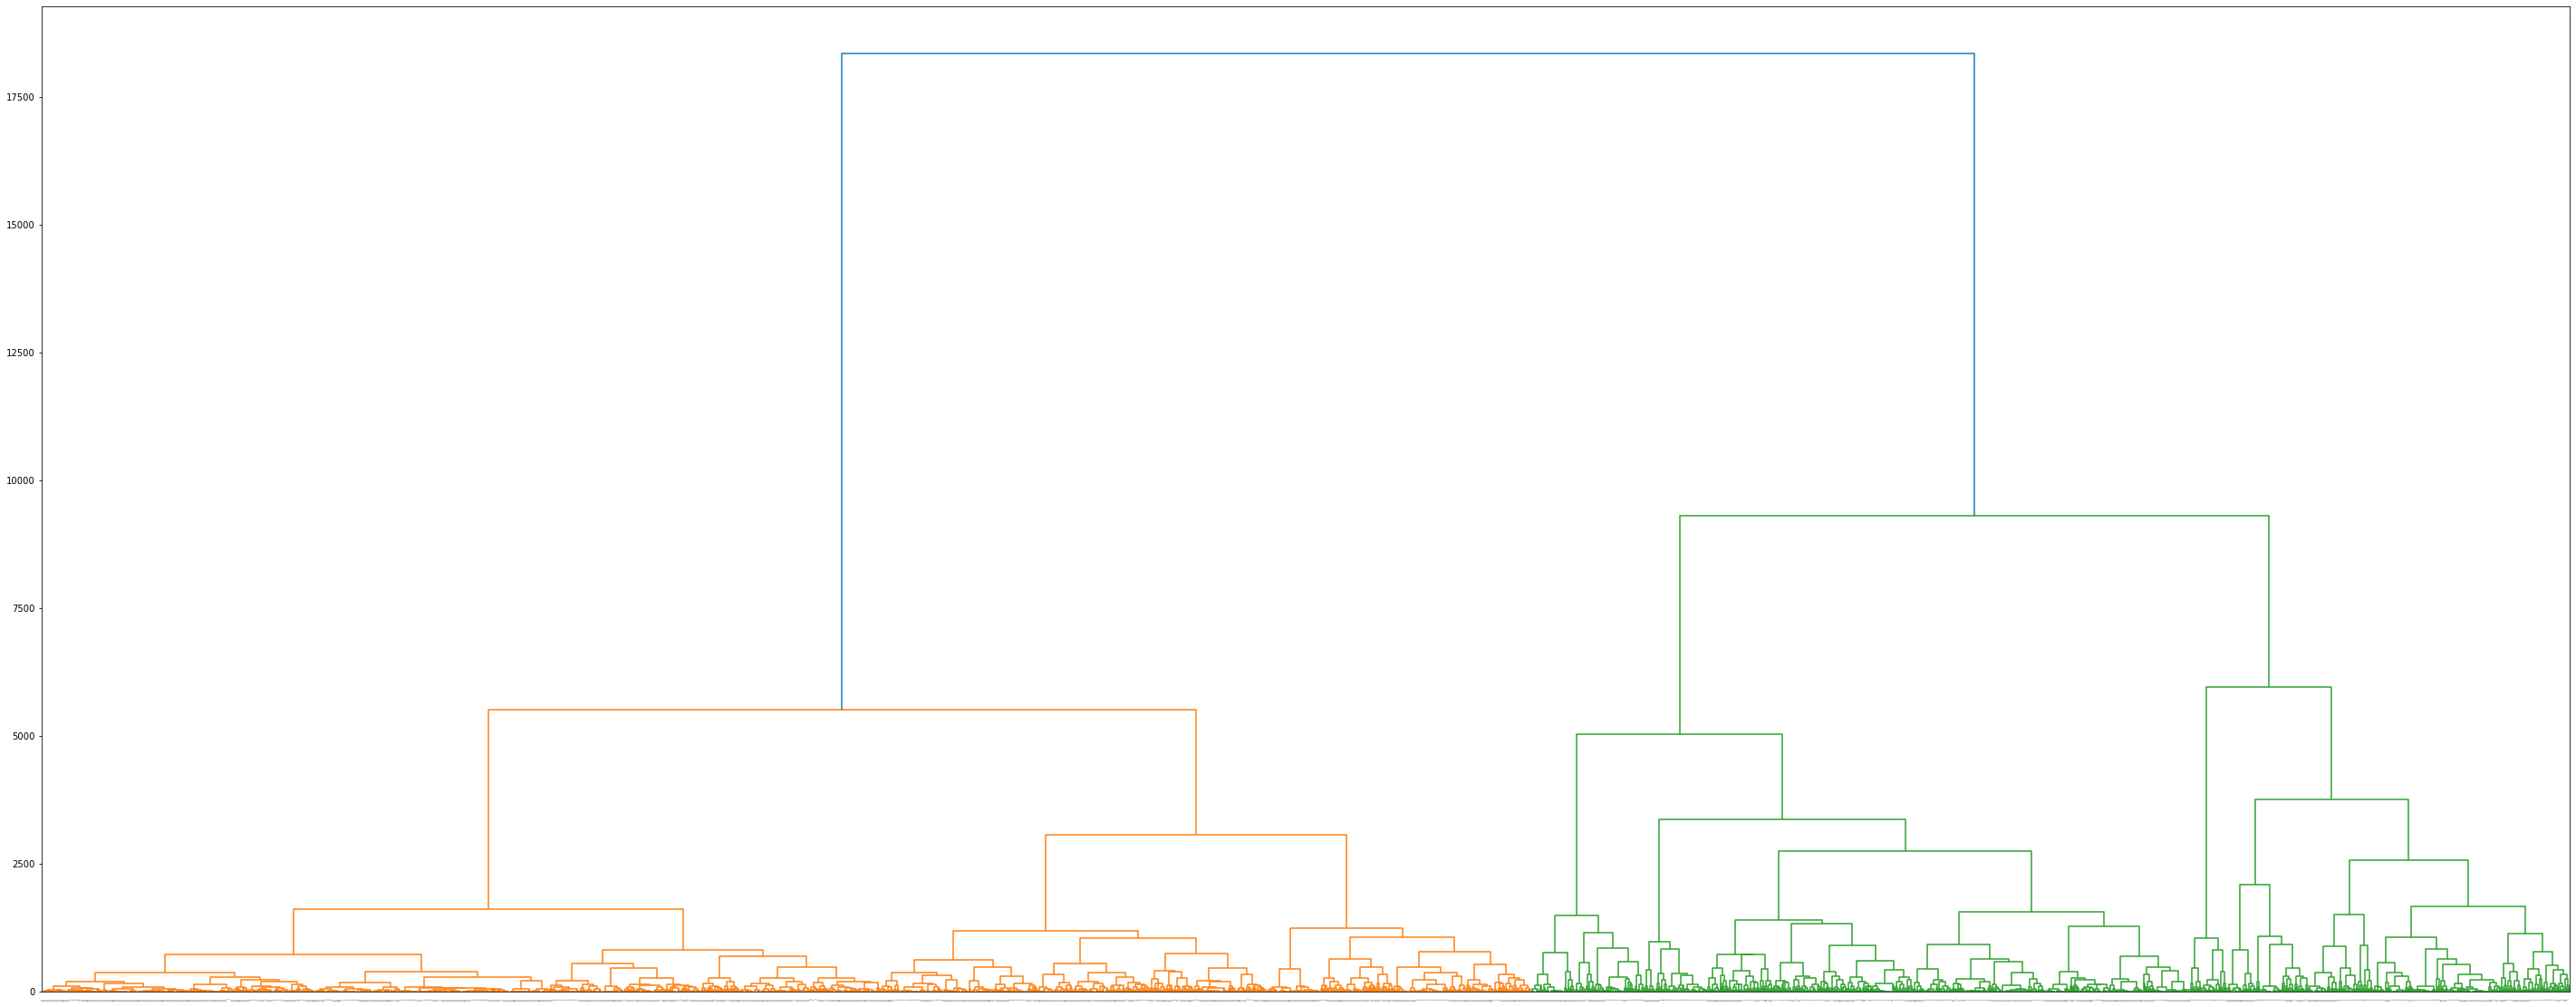

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


feature = train.drop(['유입량', '연','월','일', '시간', '홍수사상번호'], axis = 1)

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

In [11]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

[1 2 3]


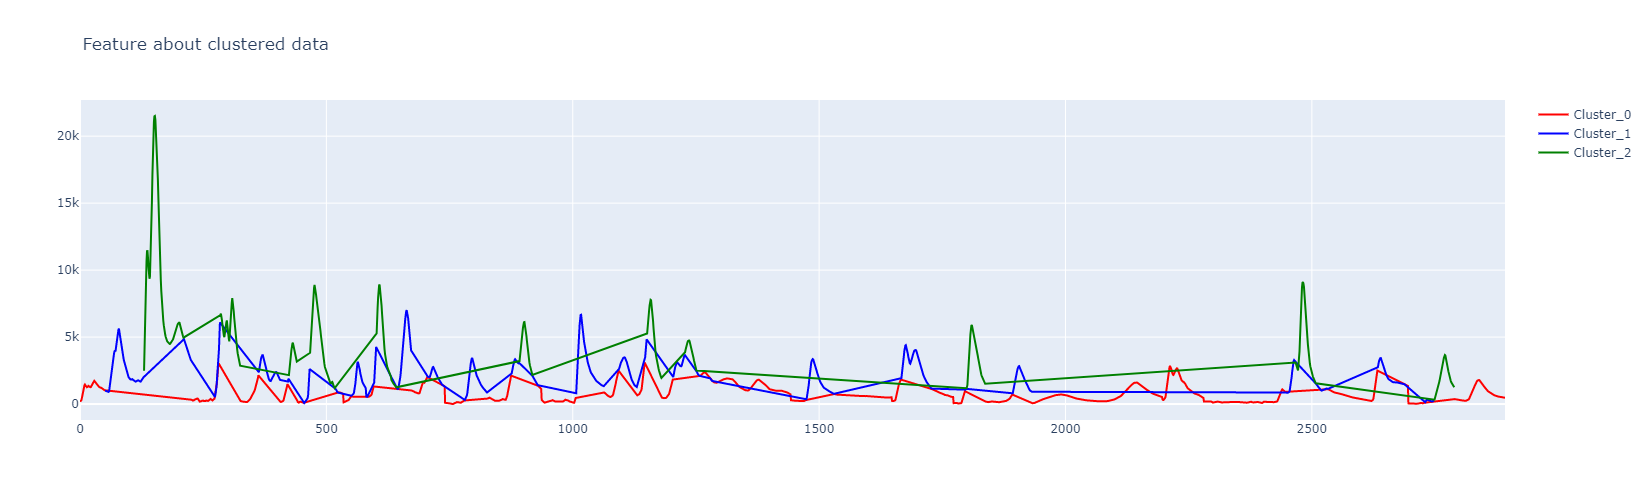

In [12]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
print(np.unique(predict))
feature['cluster']=predict
train2 = train
train2 = pd.merge(train2,feature, how='right')
train_0 = train2[train2['cluster'] ==1]
train_1 = train2[train2['cluster']==2]
train_2 = train2[train2['cluster']==3]
#train_3 = train2[train2['cluster']==4]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0['유입량']
cnt_srs_1 = train_1['유입량']
cnt_srs_2 = train_2['유입량']
#cnt_srs_3 = train_3['유입량']
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
#trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Feature about clustered data'
)

data = [trace_0,trace_1,trace_2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Clustering flood")

In [9]:
print(np.shape(train_0))
print(np.shape(train_1))
print(np.shape(train_2))

(1705, 49)
(754, 49)
(434, 49)


In [10]:
train_data = feature.drop(['cluster'], axis =1)
train_label = feature.cluster

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
clf.fit(train_data, train_label)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [12]:
test_data = test.drop(['연','월','일', '시간', '홍수사상번호', '유입량'], axis = 1)

In [13]:
clf_result = clf.predict(test_data)

In [14]:
test_data['cluster'] = clf_result

In [15]:
test_data

,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6,cluster
2892,14.2576,32.0,0.0,0.0,0.0,1.93,120.49375,10.9657,32.0,0.0,0.0,0.0,1.93,120.466667,10.9657,32.0,0.0,0.0,0.0,1.93,120.466667,7.9442,32.0,0.0,1.0,0.0,1.93,120.535714,1.1150,32.0,0.0,1.0,0.0,1.93,120.528,0.8413,32.0,0.0,1.0,0.0,1.93,120.515,1
2893,10.9657,20.0,1.0,0.0,0.0,1.93,120.48750,7.9442,20.0,1.0,0.0,0.0,1.93,120.466667,7.9442,20.0,1.0,0.0,0.0,1.93,120.466667,7.8916,21.0,1.0,14.0,8.0,1.93,120.532143,5.0550,21.0,1.0,14.0,8.0,1.93,120.524,4.7653,21.0,1.0,14.0,8.0,1.93,120.510,1
2894,7.9442,11.0,5.0,0.0,0.0,1.92,120.48125,7.8916,12.0,5.0,0.0,0.0,1.92,120.466667,7.8916,12.0,5.0,1.0,0.0,1.92,120.466667,13.3484,21.0,5.0,19.0,24.0,1.92,120.528571,13.3001,21.0,5.0,19.0,24.0,1.92,120.520,12.9398,21.0,5.0,19.0,24.0,1.92,120.505,1
2895,7.8916,3.0,11.0,0.0,0.0,1.92,120.47500,13.3484,13.0,11.0,1.0,0.0,1.92,120.466667,13.3484,13.0,11.0,14.0,8.0,1.92,120.466667,20.0760,18.0,11.0,22.0,33.0,1.92,120.525000,20.0760,18.0,11.0,22.0,33.0,1.92,120.516,19.6616,18.0,11.0,22.0,33.0,1.92,120.500,1
2896,13.3484,4.0,25.0,1.0,8.0,1.92,120.47500,20.0760,18.0,25.0,14.0,8.0,1.92,120.466667,20.0760,18.0,25.0,19.0,24.0,1.92,120.475000,27.0355,20.0,25.0,23.0,36.0,1.92,120.521429,26.9742,20.0,25.0,23.0,36.0,1.92,120.512,26.6211,20.0,25.0,23.0,36.0,1.92,120.495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,2.3689,1.0,0.0,0.0,0.0,3.16,129.99375,2.3689,1.0,0.0,0.0,0.0,3.16,130.016667,2.3689,1.0,0.0,0.0,0.0,3.16,130.025000,2.3689,1.0,0.0,1.0,0.0,3.16,129.882143,2.3689,1.0,0.0,1.0,0.0,3.16,129.916,2.1722,1.0,0.0,0.0,0.0,3.16,129.950,1
3048,2.3689,1.0,0.0,0.0,0.0,3.15,130.00625,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,1.0,0.0,3.15,129.896429,2.3689,1.0,0.0,1.0,0.0,3.15,129.928,2.0805,1.0,0.0,0.0,0.0,3.15,129.970,1
3049,2.3689,1.0,0.0,0.0,0.0,3.13,130.01250,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,1.0,0.0,3.13,129.910714,2.3689,1.0,0.0,1.0,0.0,3.13,129.940,2.0354,1.0,0.0,0.0,0.0,3.13,129.980,1
3050,2.3689,1.0,0.0,0.0,0.0,3.11,130.01875,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,1.0,0.0,3.11,129.925000,2.3488,1.0,0.0,1.0,0.0,3.11,129.952,1.8993,1.0,0.0,0.0,0.0,3.11,129.990,1


In [16]:
train_group1 = train2[train2.cluster == 1].reset_index()
train_group2 = train2[train2.cluster == 2].reset_index()
train_group3 = train2[train2.cluster == 3].reset_index()

test_group1 = test_data[test_data.cluster == 1].reset_index()
test_group2 = test_data[test_data.cluster == 2].reset_index()
test_group3 = test_data[test_data.cluster == 3].reset_index()

In [17]:
train_group1_data = train_group1.drop(['cluster', '홍수사상번호', '연', '월', '일', '시간', '유입량'], axis = 1)
train_group2_data = train_group2.drop(['cluster', '홍수사상번호', '연', '월', '일', '시간', '유입량'], axis = 1)
train_group3_data = train_group3.drop(['cluster', '홍수사상번호', '연', '월', '일', '시간', '유입량'], axis = 1)

train_group1_label = train_group1.유입량
train_group2_label = train_group2.유입량
train_group3_label = train_group3.유입량

test_group1 = test_group1.drop(['cluster'], axis = 1)
test_group2 = test_group2.drop(['cluster'], axis = 1)
test_group3 = test_group3.drop(['cluster'], axis = 1)

In [18]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [20]:
random.seed(42)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
i = 0
xgb1_models={}
for train_index, valid_index in kf.split(train_group1_data):
    X_train1, X_val1 = train_group1_data.iloc[train_index], train_group1_data.iloc[valid_index]
    y_train1, y_val1 = train_group1_label.iloc[train_index], train_group1_label.iloc[valid_index]
    xgb1 = XGBRegressor(n_estimators=10000, n_jobs = -1)
    xgb1.fit(X_train1, y_train1, 
            eval_set=[(X_train1, y_train1), (X_val1, y_val1)], 
            early_stopping_rounds=50,
           verbose=100)
    xgb1_models[i]=xgb1
    i= i+1

[0]	validation_0-rmse:654.05853	validation_1-rmse:689.07837
[68]	validation_0-rmse:8.22594	validation_1-rmse:365.82352
[0]	validation_0-rmse:576.43457	validation_1-rmse:934.25952
[100]	validation_0-rmse:5.37345	validation_1-rmse:299.21762
[200]	validation_0-rmse:1.45935	validation_1-rmse:298.86703
[218]	validation_0-rmse:1.18122	validation_1-rmse:298.83014
[0]	validation_0-rmse:691.50354	validation_1-rmse:394.56821
[56]	validation_0-rmse:13.79523	validation_1-rmse:249.54761
[0]	validation_0-rmse:632.42493	validation_1-rmse:731.56995
[62]	validation_0-rmse:10.31915	validation_1-rmse:344.79407
[0]	validation_0-rmse:678.41449	validation_1-rmse:470.94394
[54]	validation_0-rmse:11.46346	validation_1-rmse:288.17444


In [21]:
random.seed(42)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
i = 0
xgb2_models={}
for train_index, valid_index in kf.split(train_group2_data):
    X_train2, X_val2 = train_group2_data.iloc[train_index], train_group2_data.iloc[valid_index]
    y_train2, y_val2 = train_group2_label.iloc[train_index], train_group2_label.iloc[valid_index]
    xgb2 = XGBRegressor(n_estimators=10000, n_jobs= -1)
    xgb2.fit(X_train2, y_train2, 
            eval_set=[(X_train2, y_train2), (X_val2, y_val2)], 
            early_stopping_rounds=50,
           verbose=100)
    xgb2_models[i]=xgb2
    i= i+1

[0]	validation_0-rmse:1815.80701	validation_1-rmse:1996.47815
[55]	validation_0-rmse:15.40420	validation_1-rmse:779.10968
[0]	validation_0-rmse:1847.78491	validation_1-rmse:2047.13074
[66]	validation_0-rmse:13.25216	validation_1-rmse:725.78229
[0]	validation_0-rmse:1810.84998	validation_1-rmse:2138.12134
[84]	validation_0-rmse:9.25998	validation_1-rmse:597.12567
[0]	validation_0-rmse:1887.82044	validation_1-rmse:1818.77930
[100]	validation_0-rmse:6.75890	validation_1-rmse:661.13824
[107]	validation_0-rmse:6.02771	validation_1-rmse:661.19598
[0]	validation_0-rmse:1985.12231	validation_1-rmse:1422.01965
[60]	validation_0-rmse:16.89549	validation_1-rmse:843.10608


In [22]:
random.seed(42)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
i = 0
xgb3_models={}
for train_index, valid_index in kf.split(train_group3_data):
    X_train3, X_val3 = train_group3_data.iloc[train_index], train_group3_data.iloc[valid_index]
    y_train3, y_val3 = train_group3_label.iloc[train_index], train_group3_label.iloc[valid_index]
    xgb3 = XGBRegressor(n_estimators=10000, n_jobs = -1)
    xgb3.fit(X_train3, y_train3, 
            eval_set=[(X_train3, y_train3), (X_val3, y_val3)], 
            early_stopping_rounds=50,
           verbose=100)
    xgb3_models[i]=xgb3
    i= i+1

[0]	validation_0-rmse:3259.29932	validation_1-rmse:8522.70019
[100]	validation_0-rmse:4.41838	validation_1-rmse:4446.76660
[169]	validation_0-rmse:0.90122	validation_1-rmse:4447.23242
[0]	validation_0-rmse:4493.28223	validation_1-rmse:4150.07959
[100]	validation_0-rmse:3.43160	validation_1-rmse:1743.93628
[184]	validation_0-rmse:0.38163	validation_1-rmse:1743.74255
[0]	validation_0-rmse:4653.48340	validation_1-rmse:3039.30273
[58]	validation_0-rmse:17.47878	validation_1-rmse:838.32745
[0]	validation_0-rmse:4647.19775	validation_1-rmse:3208.96069
[100]	validation_0-rmse:4.64965	validation_1-rmse:703.82971
[167]	validation_0-rmse:0.66090	validation_1-rmse:703.47418
[0]	validation_0-rmse:4699.18262	validation_1-rmse:2690.72656
[54]	validation_0-rmse:21.70390	validation_1-rmse:752.06061


In [23]:
pred_y1 = train_group1_label.copy
pred_y1 = 0
for fold in range(5):
    pred_y1 += xgb1_models[fold].predict(train_group1_data)/5

In [24]:
pred_y2 = train_group2_label.copy
pred_y2 = 0
for fold in range(5):
    pred_y2 += xgb2_models[fold].predict(train_group2_data)/5

In [25]:
pred_y3 = train_group3_label.copy
pred_y3 = 0
for fold in range(5):
    pred_y3 += xgb3_models[fold].predict(train_group3_data)/5

In [26]:
pred_result = np.concatenate([pred_y1, pred_y2, pred_y3])

In [27]:
actual_value = np.concatenate([train_group1_label, train_group2_label, train_group3_label])

In [28]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(actual_value, pred_result)
np.sqrt(MSE)

284.5881905250335

In [29]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_group1_label, pred_y1)
np.sqrt(MSE)

101.09686358023684

In [30]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_group2_label, pred_y2)
np.sqrt(MSE)

192.22462894861602

In [31]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_group3_label, pred_y3)
np.sqrt(MSE)

659.9447045635485

In [32]:
print(test_group1.shape)
print(test_group2.shape)
print(test_group3.shape)

(114, 43)
(19, 43)
(27, 43)


In [36]:
xgb_nf1 = XGBRegressor(n_estimators=10000000, n_jobs=-1)
xgb_nf1.fit(train_group1_data, train_group1_label, 
         eval_set=[(X_train1, y_train1)],
         eval_metric = 'rmse',
         early_stopping_rounds=100,
         verbose=100)

[0]	validation_0-rmse:680.86707
[100]	validation_0-rmse:7.18959
[200]	validation_0-rmse:2.25986
[300]	validation_0-rmse:0.92595
[400]	validation_0-rmse:0.42467
[500]	validation_0-rmse:0.20810
[600]	validation_0-rmse:0.10536
[700]	validation_0-rmse:0.05604
[800]	validation_0-rmse:0.02814
[900]	validation_0-rmse:0.01474
[1000]	validation_0-rmse:0.00824
[1100]	validation_0-rmse:0.00416
[1200]	validation_0-rmse:0.00264
[1286]	validation_0-rmse:0.00264


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000000, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [37]:
xgb_nf2 = XGBRegressor(n_estimators=10000000, n_jobs=-1)
xgb_nf2.fit(train_group2_data, train_group2_label, 
         eval_set=[(X_train2, y_train2)],
         eval_metric = 'rmse',
         early_stopping_rounds=100,
         verbose=100)

[0]	validation_0-rmse:1992.21497
[100]	validation_0-rmse:8.73128
[200]	validation_0-rmse:1.65750
[300]	validation_0-rmse:0.39667
[400]	validation_0-rmse:0.10530
[500]	validation_0-rmse:0.02445
[600]	validation_0-rmse:0.00651
[700]	validation_0-rmse:0.00167
[800]	validation_0-rmse:0.00158
[804]	validation_0-rmse:0.00158


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000000, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [38]:
xgb_nf3 = XGBRegressor(n_estimators=10000000, n_jobs=-1)
xgb_nf3.fit(train_group3_data, train_group3_label, 
         eval_set=[(X_train3, y_train3)],
         eval_metric = 'rmse',
         early_stopping_rounds=100,
         verbose=100)

[0]	validation_0-rmse:4710.24756
[100]	validation_0-rmse:8.05786
[200]	validation_0-rmse:0.89997
[300]	validation_0-rmse:0.12704
[400]	validation_0-rmse:0.01785
[500]	validation_0-rmse:0.00395
[600]	validation_0-rmse:0.00374
[643]	validation_0-rmse:0.00374


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000000, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [39]:
pred_y_nf1 = xgb_nf1.predict(train_group1_data)
pred_y_nf2 = xgb_nf2.predict(train_group2_data)
pred_y_nf3 = xgb_nf3.predict(train_group3_data)

In [41]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_group1_label, pred_y_nf1)
np.sqrt(MSE)

0.002783836106350399

In [42]:
MSE = mean_squared_error(train_group2_label, pred_y_nf2)
np.sqrt(MSE)

0.0015764405439803644

In [43]:
MSE = mean_squared_error(train_group3_label, pred_y_nf3)
np.sqrt(MSE)

0.0034192908925825124

In [47]:
train3 = train.drop(['홍수사상번호', '연', '월', '일', '시간', '유입량'], axis = 1)
train3_y = train.유입량

In [50]:
xgb1 = XGBRegressor(n_estimators=10000000, n_jobs=-1)
xgb1.fit(train3, train3_y, 
         eval_set=[(train3, train3_y)],
         eval_metric = 'rmse',
         early_stopping_rounds=100,
         verbose=100)

[0]	validation_0-rmse:2012.75635
[100]	validation_0-rmse:28.35363
[200]	validation_0-rmse:11.21136
[300]	validation_0-rmse:5.27433
[400]	validation_0-rmse:2.78268
[500]	validation_0-rmse:1.58544
[600]	validation_0-rmse:0.90703
[700]	validation_0-rmse:0.53902
[800]	validation_0-rmse:0.32960
[900]	validation_0-rmse:0.20071
[1000]	validation_0-rmse:0.13501
[1100]	validation_0-rmse:0.08854
[1200]	validation_0-rmse:0.06492
[1300]	validation_0-rmse:0.05020
[1400]	validation_0-rmse:0.04299
[1500]	validation_0-rmse:0.03982
[1600]	validation_0-rmse:0.03858
[1700]	validation_0-rmse:0.03812
[1800]	validation_0-rmse:0.03791
[1900]	validation_0-rmse:0.03781
[2000]	validation_0-rmse:0.03780
[2031]	validation_0-rmse:0.03780


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000000, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [52]:
pred_y_new = xgb1.predict(train3)
MSE = mean_squared_error(pred_y_new, train3_y)
np.sqrt(MSE)

0.03779636047733368